### Alunos:
##### Felipe Leão, Rafael Santos, Danilo Scheltes e Henrique Lyrio

Dataset utilizado: https://www.kaggle.com/datasets/gallo33henrique/bitcoin-btc-usd-stock-dataset?resource=download

O roteiro do pytorch foi criado um miniprojeto de uma IA que faz a predição do preço do bitcoin em dolar, o dataset utilizado foi dividido em 2 partes
1. Treinamento, teste incial e salvar os pesos da rede neural
2. Um dataset com menos dados para fazer uma predição e testes com os pesos salvos

# Pytorch

##Download do dataset

1. dataset.csv
2. datasetteste.csv

In [30]:
import gdown

# URL do arquivo compartilhado
url = 'https://drive.google.com/uc?id=1dPpMVTgZr3crG5FGmCSpjY453jeNVssx'

# Nome do arquivo de saída
output = 'dataset.csv'

# Baixando o arquivo
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1TXd2-9MtYvEXzXV94cc_pADnYmwBPL85'

# Nome do arquivo de saída
output = 'datasetteste.csv'

# Baixando o arquivo
gdown.download(url, output, quiet=False)

print("\nDownload concluído!")


Downloading...
From: https://drive.google.com/uc?id=1dPpMVTgZr3crG5FGmCSpjY453jeNVssx
To: /content/dataset.csv
100%|██████████| 251k/251k [00:00<00:00, 4.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TXd2-9MtYvEXzXV94cc_pADnYmwBPL85
To: /content/datasetteste.csv
100%|██████████| 31.4k/31.4k [00:00<00:00, 34.4MB/s]


Download concluído!


## 1. Carregar o Dataset e Ajustar Features

In [25]:
# 1. Carregar o Dataset e Ajustar Features
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Carregar o dataset
data = pd.read_csv('dataset.csv')

# Selecionar as colunas de interesse
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
labels = data['Close'].values  # Para previsão de preço de fechamento

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converter para tensores
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Ajustar para forma (n, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)    # Ajustar para forma (n, 1)


## 2. Ajustar o Modelo para Regressão



In [26]:
# 2. Ajustar o Modelo para Regressão
# Definição da arquitetura da rede
input_size = X_train.shape[1]
hidden_size1 = 256  # Aumentar o número de neurônios na primeira camada
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32
hidden_size5 = 16
output_size = 1  # Para previsão de preço de fechamento (regressão)

# Definir camadas
class BitcoinPricePredictor(nn.Module):
    def __init__(self):
        super(BitcoinPricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.fc5 = nn.Linear(hidden_size4, hidden_size5)
        self.fc6 = nn.Linear(hidden_size5, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)  # 30% de dropout

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Dropout após a primeira camada
        x = self.relu(self.fc2(x))
        x = self.dropout(x)  # Dropout após a segunda camada
        x = self.relu(self.fc3(x))
        x = self.dropout(x)  # Dropout após a terceira camada
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        x = self.fc6(x)  # Última camada não precisa de ativação
        return x

# Inicializar o modelo
model = BitcoinPricePredictor()

# Função de perda e otimizador
criterion = nn.MSELoss()  # Para problemas de regressão
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 3. Treinamento do Modelo

In [27]:
# 3. Treinamento do Modelo
epochs = 500
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()  # Colocar o modelo em modo de treinamento
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)  # Cálculo da perda

    loss.backward()
    optimizer.step()

    # Avaliação em cada 10 épocas
    if (epoch + 1) % 10 == 0:
        model.eval()  # Colocar o modelo em modo de avaliação
        with torch.no_grad():
            outputs = model(X_test)
            test_loss = criterion(outputs, y_test)  # Cálculo da perda no conjunto de teste

            train_losses.append(loss.item())
            test_losses.append(test_loss.item())
            print(f'Epoch [{epoch+1}/{epochs}], Loss (Train): {loss.item():.4f}, Loss (Test): {test_loss.item():.4f}')

# Salvar pesos do modelo
torch.save(model.state_dict(), 'bitcoin_pesos_pytorch.pth')


Epoch [10/500], Loss (Train): 596446592.0000, Loss (Test): 653173056.0000
Epoch [20/500], Loss (Train): 596341440.0000, Loss (Test): 653031936.0000
Epoch [30/500], Loss (Train): 595779200.0000, Loss (Test): 652296384.0000
Epoch [40/500], Loss (Train): 593394688.0000, Loss (Test): 649222656.0000
Epoch [50/500], Loss (Train): 584926144.0000, Loss (Test): 638433152.0000
Epoch [60/500], Loss (Train): 558987008.0000, Loss (Test): 605975680.0000
Epoch [70/500], Loss (Train): 491993536.0000, Loss (Test): 523418208.0000
Epoch [80/500], Loss (Train): 350532416.0000, Loss (Test): 353977408.0000
Epoch [90/500], Loss (Train): 145064912.0000, Loss (Test): 129616560.0000
Epoch [100/500], Loss (Train): 70661552.0000, Loss (Test): 89060896.0000
Epoch [110/500], Loss (Train): 54182952.0000, Loss (Test): 63641260.0000
Epoch [120/500], Loss (Train): 52491392.0000, Loss (Test): 54535220.0000
Epoch [130/500], Loss (Train): 46088424.0000, Loss (Test): 50003276.0000
Epoch [140/500], Loss (Train): 43788024.00

## 4. Avaliação e Plotagem dos Resultados

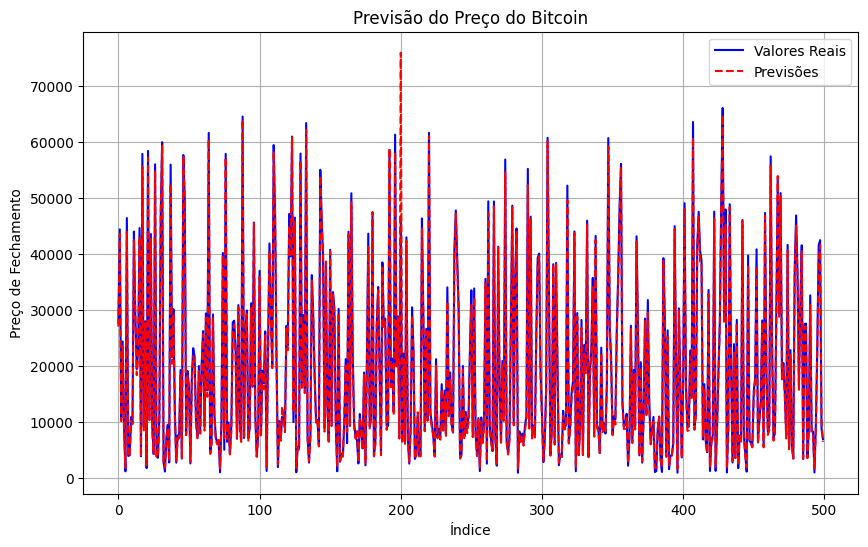

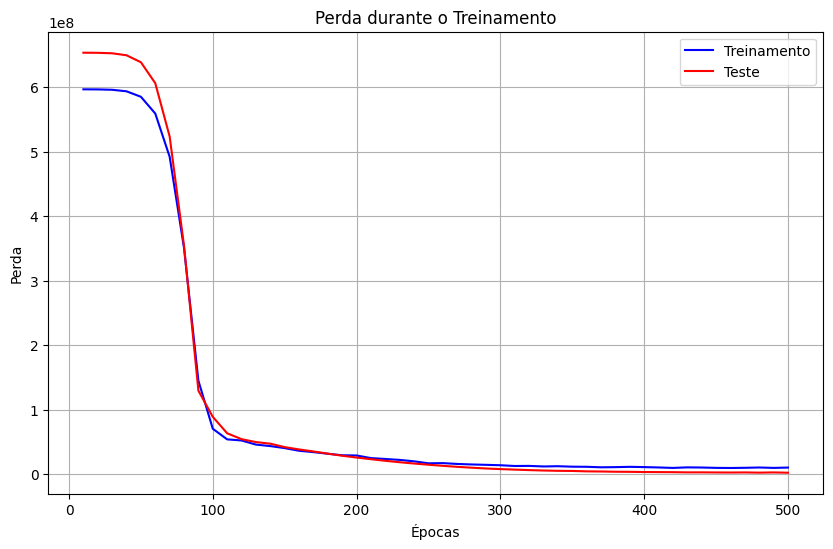

MAE: 752.3038, R²: 0.9907
Preço Real vs Previsão (30 Primeiras):
Preço Real: 27658.78, Previsão: 26974.03, Diferença: 684.75
Preço Real: 44338.80, Previsão: 43512.75, Diferença: 826.05
Preço Real: 10701.69, Previsão: 10119.83, Diferença: 581.87
Preço Real: 24327.64, Previsão: 23517.28, Diferença: 810.37
Preço Real: 9277.97, Previsão: 8683.82, Diferença: 594.15
Preço Real: 1165.20, Previsão: 1841.80, Diferença: -676.60
Preço Real: 46365.40, Previsão: 43881.41, Diferença: 2483.99
Preço Real: 3924.37, Previsão: 3845.31, Diferença: 79.06
Preço Real: 4022.17, Previsão: 3908.89, Diferença: 113.28
Preço Real: 10855.37, Previsão: 10199.47, Diferença: 655.90
Preço Real: 9888.61, Previsão: 9551.34, Diferença: 337.27
Preço Real: 43949.10, Previsão: 42426.46, Diferença: 1522.64
Preço Real: 29356.92, Previsão: 29053.55, Diferença: 303.37
Preço Real: 19417.08, Previsão: 18318.08, Diferença: 1098.99
Preço Real: 22465.48, Previsão: 21485.68, Diferença: 979.80
Preço Real: 44575.20, Previsão: 43063.67, 

In [28]:
# 4. Avaliação e Plotagem dos Resultados
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Previsões no conjunto de teste
model.eval()  # Colocar o modelo em modo de avaliação
with torch.no_grad():
    predicted = model(X_test).view(-1)

# Cálculo das métricas
mae = mean_absolute_error(y_test.numpy(), predicted.numpy())
r2 = r2_score(y_test.numpy(), predicted.numpy())

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.numpy(), label='Valores Reais', color='blue')
plt.plot(predicted.numpy(), label='Previsões', color='red', linestyle='--')
plt.title('Previsão do Preço do Bitcoin')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

# Plotar perda durante o treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(10, epochs + 1, 10), train_losses, label='Treinamento', color='blue')
plt.plot(range(10, epochs + 1, 10), test_losses, label='Teste', color='red')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

# Printar métricas
print(f'MAE: {mae:.4f}, R²: {r2:.4f}')

# Printar algumas previsões
num_previsoes = 30  # Número de previsões a serem exibidas
print("Preço Real vs Previsão (30 Primeiras):")
for real, pred in zip(y_test.numpy()[:num_previsoes], predicted.numpy()[:num_previsoes]):
    preco_real = real[0]
    previsao = pred
    dif = preco_real - previsao  # Calcular a diferença
    print(f'Preço Real: {preco_real:.2f}, Previsão: {previsao:.2f}, Diferença: {dif:.2f}')


## 5. Upload de Novo Dataset e Avaliação com Pesos Salvos

<ipython-input-31-35d4566dbc3b>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('bitcoin_pesos_pytorch.pth'))  # Carrega os pesos salvos


MAE (Novos Dados): 725.7734, R² (Novos Dados): 0.9922


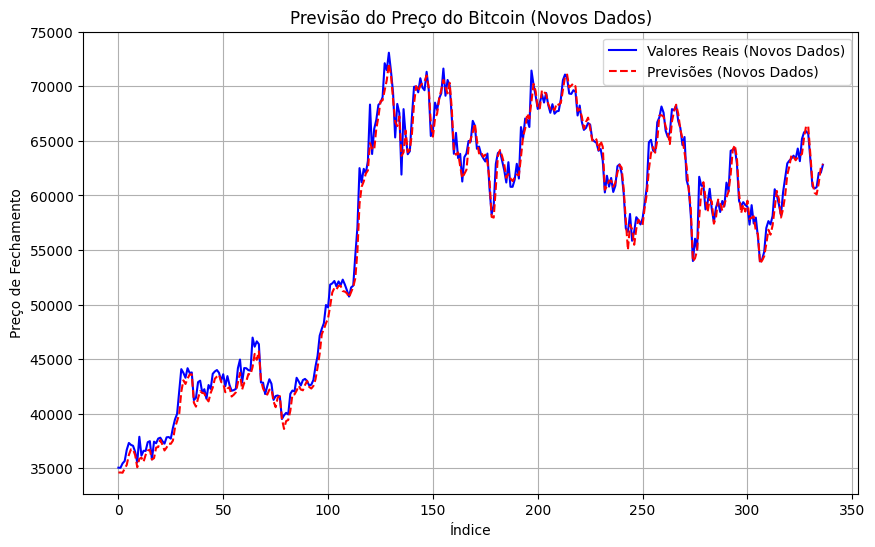

In [31]:
# 5. Avaliar o Modelo com Novos Dados
new_data = pd.read_csv('datasetteste.csv')  # Substitua pelo nome do arquivo carregado
new_features = new_data[['Open', 'High', 'Low', 'Close', 'Volume']].values
new_labels = new_data['Close'].values

# Normalizar os novos dados
new_features = scaler.transform(new_features)

# Converter para tensor
X_new = torch.tensor(new_features, dtype=torch.float32)
y_new = torch.tensor(new_labels, dtype=torch.float32).view(-1, 1)

# Carregar os pesos salvos
model.load_state_dict(torch.load('bitcoin_pesos_pytorch.pth'))  # Carrega os pesos salvos

# Avaliar o modelo com novos dados
model.eval()  # Colocar o modelo em modo de avaliação
with torch.no_grad():
    new_predicted = model(X_new).view(-1)  # Previsões e achatamento para 1D

# Calcular as métricas para novos dados
new_mae = mean_absolute_error(y_new.numpy(), new_predicted.numpy())
new_r2 = r2_score(y_new.numpy(), new_predicted.numpy())

# Printar métricas para novos dados
print(f'MAE (Novos Dados): {new_mae:.4f}, R² (Novos Dados): {new_r2:.4f}')

# Plotar resultados para novos dados
plt.figure(figsize=(10, 6))
plt.plot(y_new.numpy(), label='Valores Reais (Novos Dados)', color='blue')
plt.plot(new_predicted.numpy(), label='Previsões (Novos Dados)', color='red', linestyle='--')
plt.title('Previsão do Preço do Bitcoin (Novos Dados)')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()